# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [15]:
## Read and explore data
flight_data = pd.read_csv("flight.csv")
#print(flight_data.head())
print(flight_data.describe())
#print(flight_data.dtypes)
#print(flight_data.nunique())
#print(flight_data.isnull().sum())
#print(flight_data.isna().sum())
print(np.percentile(flight_data['coach_price'], 98))

## Task 1
#Q:What do coach ticket prices look like? What are the high and low values? 
#A:Max value: $593.64; Min value: $44.42.

#Q:What would be considered the average? 
#A:Average value: $376.58

#Q:Does $500 seem like a good price for a coach ticket?
#A:Expensive, considering this is way above the 75th percentile for this price distribution. 
#  It is even higher than the 98th percentile of $499.11! 

               miles     passengers          delay    coach_price  \
count  129780.000000  129780.000000  129780.000000  129780.000000   
mean     2006.224696     207.723155      13.162845     376.585253   
std       943.034768      12.776363      41.941680      67.744274   
min        12.000000     135.000000       0.000000      44.415000   
25%      1343.000000     204.000000       9.000000     331.445000   
50%      1986.000000     210.000000      10.000000     380.560000   
75%      2468.000000     215.000000      13.000000     426.676250   
max      4548.000000     244.000000    1560.000000     593.635000   

       firstclass_price          hours  
count     129780.000000  129780.000000  
mean        1454.931785       3.631214  
std          162.590434       1.739118  
min          939.100000       1.000000  
25%         1302.200000       2.000000  
50%         1503.840000       4.000000  
75%         1582.370000       4.000000  
max         1846.780000       8.000000  
499.11129

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [16]:
## Task 2
eight_hours = flight_data[(flight_data['hours'] == 8.0)]
print(eight_hours.describe())
print(np.percentile(eight_hours['coach_price'], 86))

#A: Max val: 593.64; Min val: 170.77; Average: 431.83. 
#   Five hundred for an eight hour flight is still expensive considering the value of $500 roughly corresponds 
#   to the 86th percentile of the price distribution for eight-hour flights.

             miles   passengers        delay  coach_price  firstclass_price  \
count  2634.000000  2634.000000  2634.000000  2634.000000       2634.000000   
mean   4207.205771   207.270691    14.167426   431.834377       1571.496572   
std      69.083475    13.098447    57.863457    64.083280        153.833271   
min    4125.000000   148.000000     0.000000   170.770000       1128.770000   
25%    4154.000000   203.000000     9.000000   390.266250       1415.645000   
50%    4190.000000   209.000000    10.000000   437.115000       1632.905000   
75%    4243.000000   215.000000    13.000000   480.043750       1693.000000   
max    4548.000000   233.000000  1509.000000   593.635000       1846.140000   

        hours  
count  2634.0  
mean      8.0  
std       0.0  
min       8.0  
25%       8.0  
50%       8.0  
75%       8.0  
max       8.0  
500.67040000000003


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

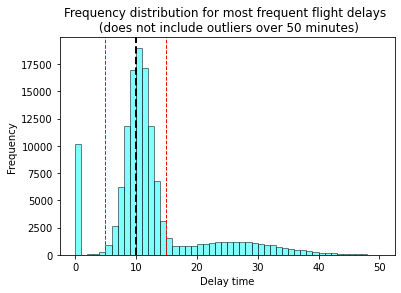

<Figure size 432x288 with 0 Axes>

In [17]:
## Task 3
plt.hist(flight_data['delay'], range=(0, 50), bins=50, edgecolor='black', color='cyan', alpha=0.5)
plt.xlabel('Delay time')
plt.ylabel('Frequency')
plt.axvline(5, color='red', linestyle='dashed', linewidth=1)
plt.axvline(15, color='red', linestyle='dashed', linewidth=1)
plt.axvline(10, color='black', linestyle='dashed', linewidth=2)
plt.title('Frequency distribution for most frequent flight delays \n (does not include outliers over 50 minutes)')
plt.show()
plt.clf()
#print(len(flight_data['delay'][(flight_data['delay'] == 10)]))

#A: Most frequent delays are between 5 and 15 minutes (dashed red lines), 
#   with the most common one being 10 minutes (dashed black line).

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

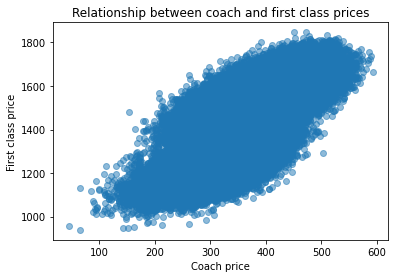

<Figure size 432x288 with 0 Axes>

In [18]:
## Task 4
plt.scatter('coach_price', 'firstclass_price', data=flight_data, alpha=0.5)
plt.xlabel('Coach price')
plt.ylabel('First class price')
plt.title('Relationship between coach and first class prices')
plt.show()
plt.clf()

#A: There is a somewhat positive linear relationship between coach and first class price.

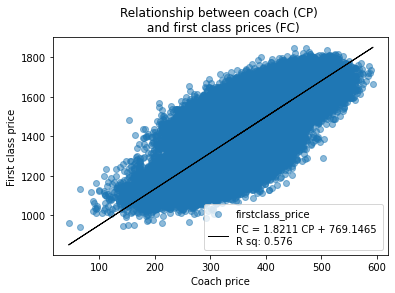

<Figure size 432x288 with 0 Axes>

In [19]:
### Calculate the linear equation and indicate Pearson's 
model = sm.OLS.from_formula('firstclass_price ~ coach_price', flight_data)
results = model.fit()
#print(results.summary())

#slope (coach_price): 1.8211
#intercept: 769.1465
#R-squared 0.576

plt.scatter('coach_price', 'firstclass_price', data=flight_data, alpha=0.5)
plt.plot(flight_data['coach_price'], results.params[0] + results.params[1] * flight_data['coach_price'], \
color='black', linewidth=1, label='FC = 1.8211CP + 769.1465 \nR sq: 0.576')
plt.xlabel('Coach price')
plt.ylabel('First class price')
plt.title('Relationship between coach (CP) \n and first class prices (FC)')
plt.legend()
plt.show()
plt.clf()

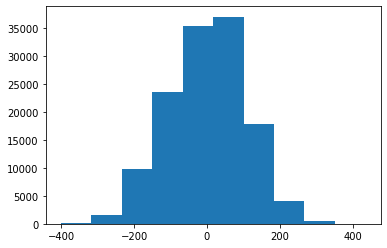

<Figure size 432x288 with 0 Axes>

In [20]:
#Check normality assumption:
fitted_values = results.predict(flight_data)
residuals = flight_data['firstclass_price'] - fitted_values
plt.hist(residuals)
plt.show()
plt.clf()

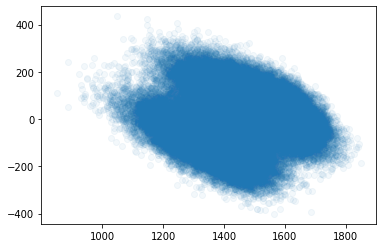

<Figure size 432x288 with 0 Axes>

In [57]:
#Check homoscedasticity assumption
plt.scatter(fitted_values, residuals, alpha=0.05)
plt.show()
plt.clf()

#   The linear regression shows a positive moderate relationship between coach price and first class price. 
#   The residuals show somewhat of a normal distribution (slight skew to the left), and the scatterplot to check homoscedasticity assumption 
#   shows a trend. This might indicate that the linear regression is not the best way to describe the relationship between coach prices
#   and first class prices. This is consistent with the calculated Pearson's coefficient for this relationship. 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

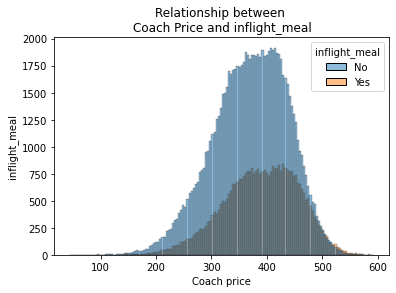

Median coach price where inflight_meal == 'No':  374.9
Median coach price where inflight_meal == 'Yes':  394.06


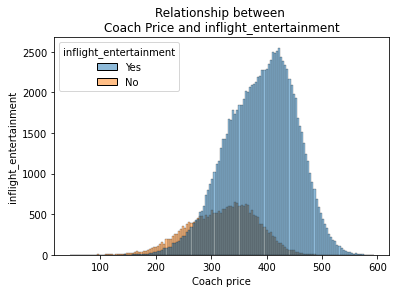

Median coach price where inflight_entertainment == 'No':  325.42
Median coach price where inflight_entertainment == 'Yes':  395.14


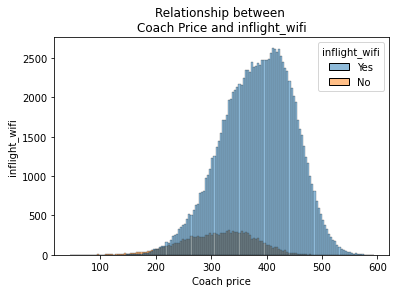

Median coach price where inflight_wifi == 'No':  317.99
Median coach price where inflight_wifi == 'Yes':  387.62


<Figure size 432x288 with 0 Axes>

In [71]:
## Task 5
features = flight_data.columns[3:6]

for feature in features:
    sns.histplot(flight_data, x='coach_price', alpha=0.5, hue=feature)
    plt.xlabel('Coach price')
    plt.ylabel(feature)
    plt.title(f'Relationship between \nCoach Price and {feature}')
    plt.show()
    plt.clf()
    print(f'Median coach price where {feature} == \'No\': ', round(flight_data.coach_price[(flight_data[feature] == 'No')].median(),2))
    print(f'Median coach price where {feature} == \'Yes\': ', round(flight_data.coach_price[(flight_data[feature] == 'Yes')].median(),2))

#A: A quick view on scatterplots show that flights with inflight features such as meal, entertainment, and WiFi tend to have higher
#   average coach prices than their counterparts. Printing out the mean coach price for each category shows this comparison numerically.

6. How does the number of passengers change in relation to the length of flights?

/home/seb/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


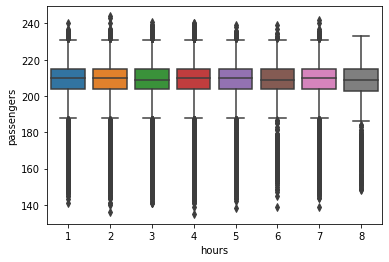

<Figure size 432x288 with 0 Axes>

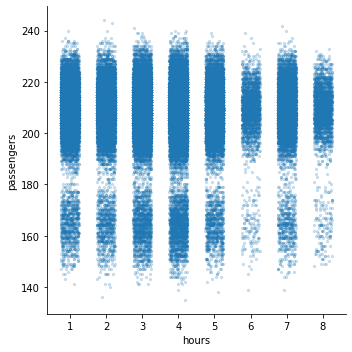

<Figure size 432x288 with 0 Axes>

In [64]:
## Task 6
sns.boxplot('hours', 'passengers', data=flight_data)
plt.show()
plt.clf()

sns.lmplot(x='hours', y='passengers', data=flight_data, x_jitter=0.25, scatter_kws={'s': 5, 'alpha':0.2}, fit_reg=False)
plt.show()
plt.clf()

#A: The number of passengers shows similar median and IQR regardless of length of flight.
#   Basically the number of passengers tend to be the same regardless of length of flight. The only notable exceptions are the 8-hour
#   flights that tend to have less outliers in the upper bound.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

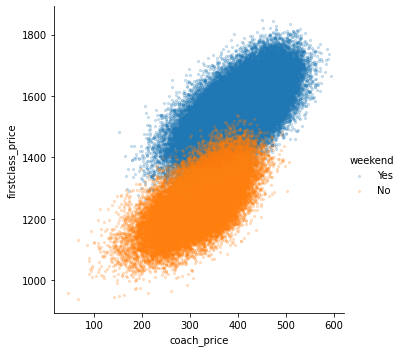

<Figure size 432x288 with 0 Axes>

In [66]:
## Task 7
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_data, hue='weekend', scatter_kws={'s': 5, 'alpha':0.2}, fit_reg=False)
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

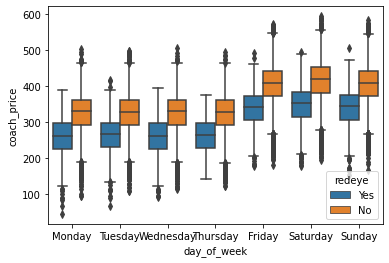

<Figure size 432x288 with 0 Axes>

In [70]:
## Task 8
sns.boxplot(x='day_of_week', y='coach_price', data=flight_data, hue='redeye', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()
plt.clf()



